# Prompt Chaining WorkFlow: Generate Blog

In [14]:
from langgraph.graph import StateGraph, START, END
from langchain_google_genai import ChatGoogleGenerativeAI
from typing import TypedDict
from dotenv import load_dotenv
import os

# load env
load_dotenv()

# load keys
GOOGLE_API_KEY = os.getenv("GOOGLE_API_KEY")

# load model
model = ChatGoogleGenerativeAI(
        model="models/gemini-1.5-flash-latest",
        temperature=0.6,
        convert_system_message_to_human=True
    )

# create a state
class BlogState(TypedDict):
    title: str
    outline: str
    content: str
    score: str

# create our graph
graph = StateGraph(BlogState)

# functions
def create_outline(state: BlogState) -> BlogState:
    # fetch title
    title = state['title']
    
    # from a prompt
    prompt = f"Generate an detailed outline for a blog on topic - {title} under 100 words"

    # call to LLM
    outline = model.invoke(prompt).content

    # update the answer in the state
    state['outline'] = outline
    return state

def create_blog(state: BlogState) -> BlogState:
    # fetch title
    title = state['title']
    outline = state['outline']
    
    # from a prompt
    prompt = f"Generate an detailed blog for a blog on topic - {title} under 500 workds only"

    # call to LLM
    content = model.invoke(prompt).content

    # update the answer in the state
    state['content'] = content
    return state

def score_blog(state: BlogState) -> BlogState:
    # fetch title
    title = state['title']
    outline = state['outline']
    content = state['content']
    
    # from a prompt
    prompt = f"based on english and blog template score my blog out of 10- {content}"

    # call to LLM
    score = model.invoke(prompt).content

    # update the answer in the state
    state['score'] = score
    return state

# add nodes
graph.add_node('create_outline', create_outline)
graph.add_node('create_blog', create_blog)
graph.add_node('score_blog', score_blog)

# add edges
graph.add_edge(START, 'create_outline')
graph.add_edge('create_outline','create_blog')
graph.add_edge('create_blog','score_blog')
graph.add_edge('score_blog', END)

# complie graph
workflow = graph.compile()

# excecute
query = input("Enter the question: ")
initial_state = {"title":str(query)}

final_state = workflow.invoke(initial_state)

print(final_state)

Enter the question:  Chess


D:\LangGraph\.lang-graph\Lib\site-packages\langchain_google_genai\chat_models.py:357: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")
D:\LangGraph\.lang-graph\Lib\site-packages\langchain_google_genai\chat_models.py:357: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")
D:\LangGraph\.lang-graph\Lib\site-packages\langchain_google_genai\chat_models.py:357: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


{'title': 'Chess', 'outline': "**I. Introduction:** Briefly define chess and its enduring appeal.\n\n**II.  Basics:**  Mention key pieces, movement, and the objective (checkmate).\n\n**III.  Strategic Elements:**  Touch upon key concepts like piece development, controlling the center, and king safety (briefly).\n\n**IV.  Getting Started:** Suggest resources for beginners (apps, websites, books).\n\n**V.  Beyond the Basics:** Hint at the depth and complexity, encouraging further exploration.\n\n**VI. Conclusion:** Reiterate chess's accessibility and rewarding nature.", 'content': "## Chess: A World in 64 Squares\n\nChess. The word conjures images of intense concentration, strategic brilliance, and the quiet click of pieces on a polished board.  More than just a game, it's a microcosm of life, a battle of wits played out on a miniature battlefield.  But what makes chess so captivating, especially for beginners?\n\nThe beauty of chess lies in its simplicity and complexity.  The rules are 

In [16]:
# title
print("Title:\n")
print(final_state['title'])
print(f"\n{'-'*30}\n")

# outline
print("Outline:\n")
print(final_state['outline'])
print(f"\n{'-'*30}\n")

# blog
print("Blog:\n")
print(final_state['content'])
print(f"\n{'-'*30}\n")

# score
print("Score:\n")
print(final_state['score'])
print(f"\n{'-'*30}\n")

Title:

Chess

------------------------------

Outline:

**I. Introduction:** Briefly define chess and its enduring appeal.

**II.  Basics:**  Mention key pieces, movement, and the objective (checkmate).

**III.  Strategic Elements:**  Touch upon key concepts like piece development, controlling the center, and king safety (briefly).

**IV.  Getting Started:** Suggest resources for beginners (apps, websites, books).

**V.  Beyond the Basics:** Hint at the depth and complexity, encouraging further exploration.

**VI. Conclusion:** Reiterate chess's accessibility and rewarding nature.

------------------------------

Blog:

## Chess: A World in 64 Squares

Chess. The word conjures images of intense concentration, strategic brilliance, and the quiet click of pieces on a polished board.  More than just a game, it's a microcosm of life, a battle of wits played out on a miniature battlefield.  But what makes chess so captivating, especially for beginners?

The beauty of chess lies in its simp

In [15]:
final_state.keys()

dict_keys(['title', 'outline', 'content', 'score'])

### Visualize the above workflow

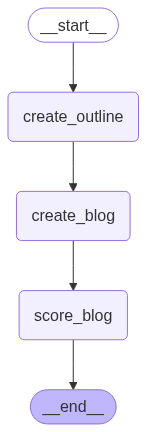

In [17]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())